In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.patches as mpatches

from scipy.stats import gaussian_kde
from scipy.optimize import minimize_scalar

from numpy.polynomial.chebyshev import Chebyshev
import numpy as np

from rich.console import Console
from rich.table import Table

from multiprocessing import Pool, cpu_count

import fastkde

import os

import constants, functions

In [2]:
### Calcul du Chi2

n_omega = 600
n_sigma = 600
n_gamma = 600

omega_vals = np.asarray(np.linspace(0.01, 1.5, n_omega))
sigma_vals = np.asarray(np.linspace(0.01, 1.4, n_sigma))
gamma_vals = np.asarray(np.linspace(0.01, 1.5, n_gamma))

chi2_grid = functions.chi2(omega_vals= omega_vals, sigma_vals=sigma_vals, gamma_vals=gamma_vals)

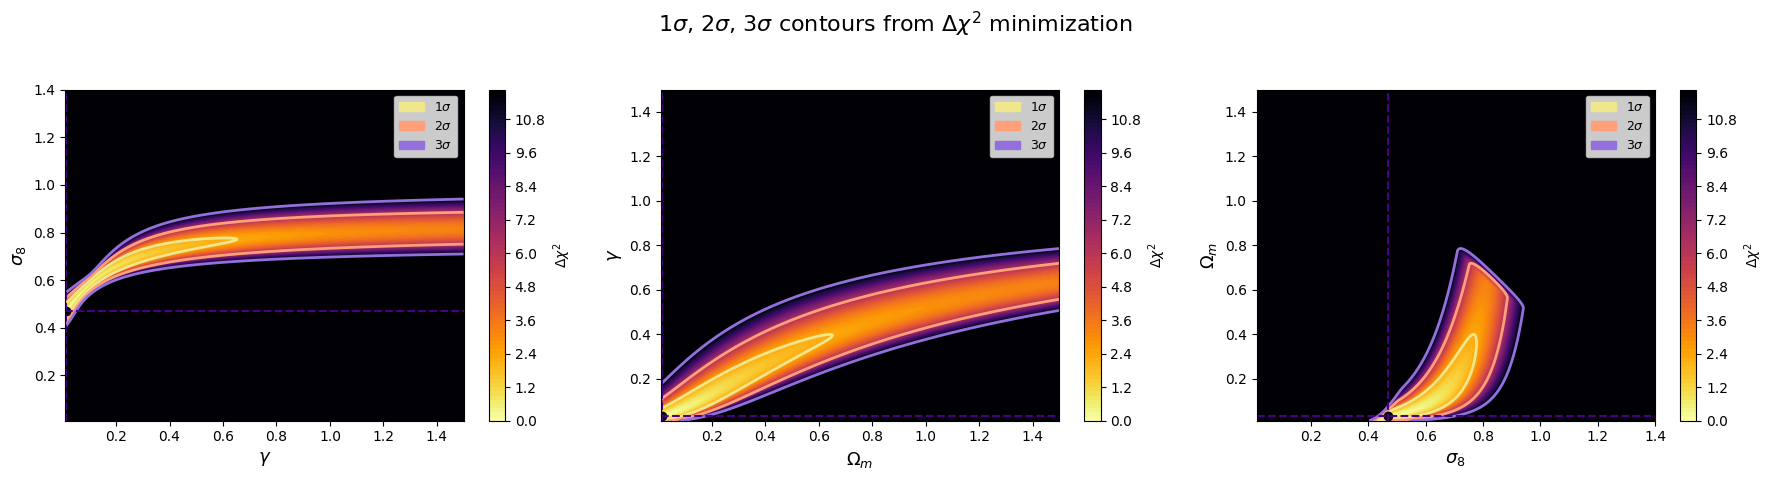

In [3]:
from matplotlib.patches import Patch

def display_all_chi2_slices_delta(chi2_grid, axes):
    sigma_levels = [2.3, 6.17, 11.8]
    colors = ['khaki', 'lightsalmon', 'mediumpurple']

    chi2_min = np.min(chi2_grid)

    axes_titles = [
        (r'$\gamma$', r'$\sigma_8$', 0),
        (r'$\Omega_m$', r'$\gamma$', 1),
        (r'$\sigma_8$', r'$\Omega_m$', 2)
    ]

    for ax, (xlabel, ylabel, axis) in zip(axes, axes_titles):
        chi2_slice = np.min(chi2_grid, axis=axis)
        delta_chi2 = chi2_slice - chi2_min

        delta_chi2_clipped = delta_chi2_clipped = np.clip(delta_chi2, a_min=None, a_max=sigma_levels[2])

        
        if axis == 0:
            X, Y = np.meshgrid(gamma_vals, sigma_vals)
        elif axis == 1:
            X, Y = np.meshgrid(omega_vals, gamma_vals)
        elif axis == 2:
            X, Y = np.meshgrid(sigma_vals, omega_vals)
        cf = ax.contourf(X, Y, delta_chi2_clipped, levels=100, cmap='inferno_r')
        plt.colorbar(cf, ax=ax, label=r'$\Delta \chi^2$')

        # 1σ, 2σ, 3σ
        for level, color in zip(sigma_levels, colors):
            cs = ax.contour(X, Y, delta_chi2, levels=[level], colors=[color], linewidths=2)
        
        legend_handles = [
            Patch(color='khaki', label=r'1$\sigma$'),
            Patch(color='lightsalmon', label=r'2$\sigma$'),
            Patch(color='mediumpurple', label=r'3$\sigma$')
        ]

        min_idx = np.unravel_index(np.argmin(delta_chi2), delta_chi2.shape)
        x_min = X[min_idx]
        y_min = Y[min_idx]
        ax.plot(x_min, y_min, 'ko', label='Best-fit')
        ax.axhline(y_min, color='indigo', linestyle='--')
        ax.axvline(x_min, color='indigo', linestyle='--')

        ax.set_xlabel(xlabel, fontsize=13)
        ax.set_ylabel(ylabel, fontsize=13)
        ax.legend(handles=legend_handles, fontsize=9, loc='upper right')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(r"1$\sigma$, 2$\sigma$, 3$\sigma$ contours from $\Delta \chi^2$ minimization", fontsize=16)
display_all_chi2_slices_delta(chi2_grid, axes)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()